In [17]:
# === Cell 1: 导入库并定义 define_transforms ===
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2



In [18]:
# === Cell 2: 加载图像或生成随机示例 ===
name = "train_356"
image_pathA = "/data8T/DSJJ/CDdata/LEVIR-CD/train/A/{}.png".format(name)
image_pathB = "/data8T/DSJJ/CDdata/LEVIR-CD/train/B/{}.png".format(name)
label_path = "/data8T/DSJJ/CDdata/LEVIR-CD/train/label/{}.png".format(name)

imgA = cv2.imread(image_pathA)
imgB = cv2.imread(image_pathB)
imgA = cv2.cvtColor(imgA, cv2.COLOR_BGR2RGB)
imgB = cv2.cvtColor(imgB, cv2.COLOR_BGR2RGB)

label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)


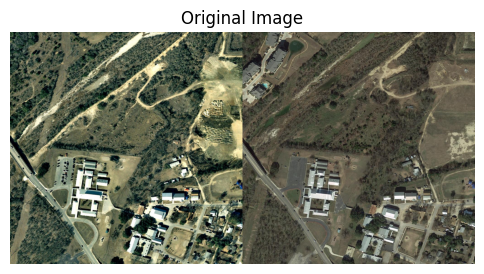

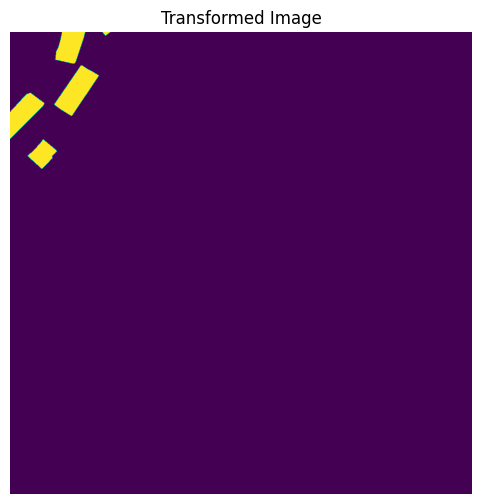

In [19]:
# === Cell 3: 原图可视化 ===
img_concat = np.concatenate((imgA, imgB), axis=1)

plt.figure(figsize=(6,6))
plt.title("Original Image")
plt.axis("off")
plt.imshow(img_concat)
plt.show()

plt.figure(figsize=(6,6))
plt.title("Transformed Image")
plt.axis("off")
plt.imshow(label)
plt.show()



In [20]:

def define_transforms(if_crop=False, crop_size=256):
    mean_value = (123.675, 116.28, 103.53)
    std_value = (58.395, 57.12, 57.375)
    train_transform = A.Compose([
            A.HorizontalFlip(p=1.0),
            A.VerticalFlip(p=1.0),
            # A.Normalize(mean=mean_value, std=std_value),
            ToTensorV2()
        ],
        additional_targets={"image": "image", "image1": "image", "mask": "mask"},
        strict=True,
        seed=120,
    )
    if if_crop:
        train_transform.transforms.insert(-3, A.Compose(
        [
            A.RandomCrop(height=crop_size, width=crop_size)
        ],
            additional_targets={"image": "image", "image1": "image", "mask": "mask"},
            strict=True,
            seed=120
            )
        )
    test_transform = A.Compose([
            # A.Normalize(mean=mean_value, std=std_value),
            ToTensorV2()
        ],
        additional_targets={"image": "image", "image1": "image", "mask": "mask"},
        strict=True,
        seed=120,
    )
    return train_transform, test_transform

255


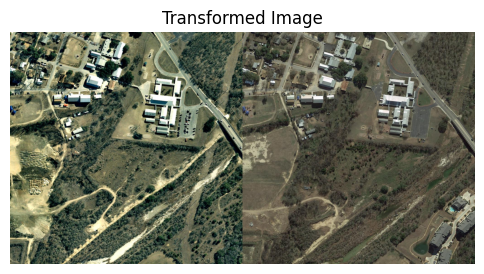

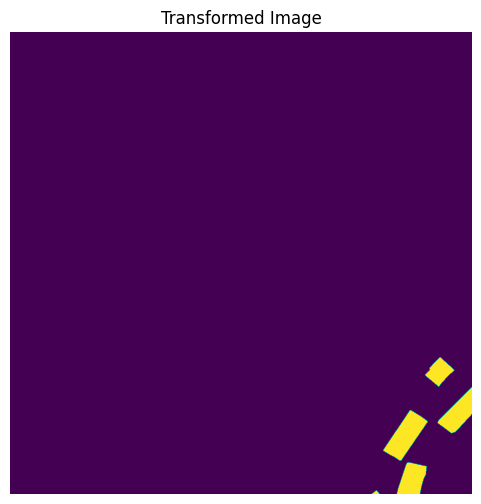

In [21]:
# === Cell 4: 应用训练增强并可视化结果 ===
import numpy as np
train_transform, test_transform = define_transforms(if_crop=False, crop_size=256)

imgA.shape, imgB.shape, label.shape

aug = train_transform(
        image=imgA,    # 第一时相 H×W×3 的 numpy 数组
        image1=imgB,   # 第二时相 H×W×3 的 numpy 数组
        mask=label        # 标签 H×W 的 numpy 数组
    )

# # Tensor (C,H,W) → NumPy (H,W,C) 并 反归一化
imgA_trans = aug["image"].permute(1, 2, 0).cpu().numpy()
imgB_trans = aug["image1"].permute(1, 2, 0).cpu().numpy()
mask_trans = aug["mask"].cpu().numpy()

imgA_trans.shape, imgB_trans.shape, mask_trans.shape

print(np.max(mask_trans))

img_concat = np.concatenate((imgA_trans, imgB_trans), axis=1)

plt.figure(figsize=(6,6))
plt.title("Transformed Image")
plt.axis("off")
plt.imshow(img_concat)
plt.show()

plt.figure(figsize=(6,6))
plt.title("Transformed Image")
plt.axis("off")
plt.imshow(mask_trans)
plt.show()

